In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model

Base = automap_base()

# reflect the tables

Base.prepare(engine, reflect=True)


In [6]:
# View all of the classes that automap found

Base.classes.keys()

['measurement', 'station']

In [11]:
# Save references to each table

measurement = Base.classes.measurement
station = Base.classes.station

In [12]:
# Create our session (link) from Python to the DB

session = Session(engine)

# Exploratory Precipitation Analysis

In [14]:
# Find the most recent date in the data set.

recent_date = latest_date = session.query(measurement.date).order_by(measurement.date.desc()).first().date
recent_date

'2017-08-23'

2016-08-23


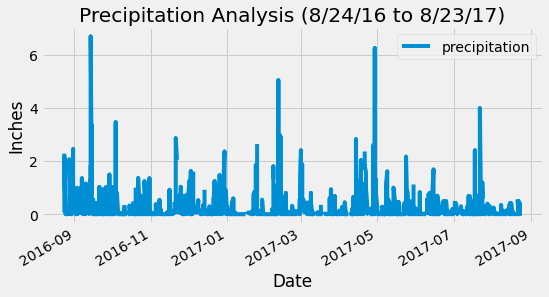

In [29]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.

one_year_recent = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(one_year_recent)

# Perform a query to retrieve the data and precipitation scores

precip_data = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date > one_year_recent).\
    order_by(measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column

precip_data_df = pd.DataFrame(precip_data)
precip_data_df.head()

# Sort the dataframe by date

precip_data_df = pd.DataFrame(precip_data,columns=['date', 'precipitation'])
precip_data_df['date'] = pd.to_datetime(precip_data_df['date'], format='%Y-%m-%d')
precip_data_df.set_index('date', inplace=True)
precip_data_df = precip_data_df.sort_values(by='date',ascending=True)

# Use Pandas Plotting with Matplotlib to plot the data

data_plot = precip_data_df.plot(figsize=(8,4))
data_plot.set_title("Precipitation Analysis (8/24/16 to 8/23/17)")
data_plot.set_ylabel('Inches')
data_plot.set_xlabel('Date')
plt.show()


In [20]:
# Use Pandas to calcualte the summary statistics for the precipitation data

precip_data_df.describe()


,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number stations in the dataset


In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()